In [1]:
import torch 
import numpy as np
from torch.utils.data import DataLoader
from model import VGG16Net
from dataset import SiameseDataset
from utils import *
import loss
import torchvision.transforms as transforms
import torch.optim as optim

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

In [4]:
train_dataset = SiameseDataset(img_dir='data/faces/training', transform=transform)
test_dataset = SiameseDataset(img_dir='data/faces/testing', transform=transform)

In [5]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [6]:
x1, x2, y1 = next(iter(train_loader))
x1.shape, x2.shape, y1.shape

(torch.Size([16, 1, 224, 224]),
 torch.Size([16, 1, 224, 224]),
 torch.Size([16, 1]))

In [25]:
for i, (x1, x2, y) in enumerate(train_loader):
    print(x1.shape, x2.shape, y.shape)

torch.Size([16, 1, 224, 224]) torch.Size([16, 1, 224, 224]) torch.Size([16, 1])
torch.Size([16, 1, 224, 224]) torch.Size([16, 1, 224, 224]) torch.Size([16, 1])
torch.Size([16, 1, 224, 224]) torch.Size([16, 1, 224, 224]) torch.Size([16, 1])
torch.Size([16, 1, 224, 224]) torch.Size([16, 1, 224, 224]) torch.Size([16, 1])
torch.Size([16, 1, 224, 224]) torch.Size([16, 1, 224, 224]) torch.Size([16, 1])
torch.Size([16, 1, 224, 224]) torch.Size([16, 1, 224, 224]) torch.Size([16, 1])
torch.Size([16, 1, 224, 224]) torch.Size([16, 1, 224, 224]) torch.Size([16, 1])
torch.Size([16, 1, 224, 224]) torch.Size([16, 1, 224, 224]) torch.Size([16, 1])
torch.Size([16, 1, 224, 224]) torch.Size([16, 1, 224, 224]) torch.Size([16, 1])
torch.Size([16, 1, 224, 224]) torch.Size([16, 1, 224, 224]) torch.Size([16, 1])
torch.Size([16, 1, 224, 224]) torch.Size([16, 1, 224, 224]) torch.Size([16, 1])
torch.Size([16, 1, 224, 224]) torch.Size([16, 1, 224, 224]) torch.Size([16, 1])
torch.Size([16, 1, 224, 224]) torch.Size

In [7]:
import matplotlib.pyplot as plt

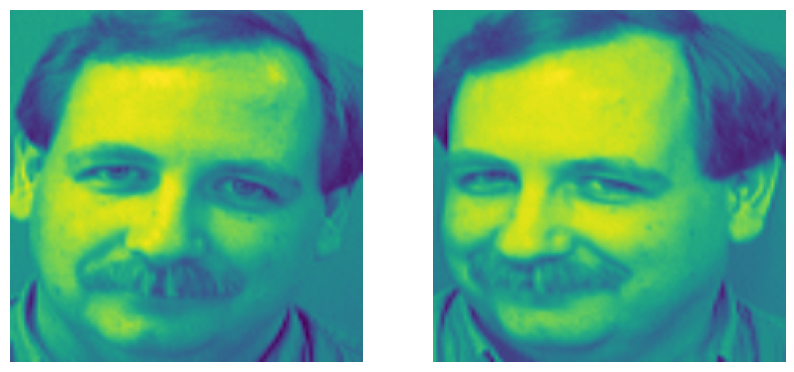

In [8]:
f = plt.figure(figsize=(10, 10))
f.add_subplot(1, 2, 1)
plt.imshow(x1[0].permute(1, 2, 0).numpy())
plt.axis('off')
f.add_subplot(1, 2, 2)
plt.imshow(x2[0].permute(1, 2, 0).numpy())
plt.axis('off')
plt.show()

In [9]:
model = VGG16Net().to(device)
loss_fn = loss.ContrastiveLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
EPOCHS = 50

In [11]:
from tqdm.auto import tqdm

In [15]:
def test(loader, model, loss_fn, device):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for _, (x1, x2, y) in enumerate(loader):
            x1 = x1.to(device)
            x2 = x2.to(device)
            y = y.to(device)

            output1, output2 = model(x1, x2)
            loss = loss_fn(output1, output2, y)
            test_loss += loss.item()

        print(f"test_loss: {test_loss}")

    model.train()

In [19]:
def train(train_loader, test_loader, model, loss_fn, optimizer, device):
    for epoch in tqdm(range(EPOCHS)):
        train_loss = 0

        for batch_idx, (x1, x2, y) in enumerate(tqdm(train_loader)):
            x1 = x1.to(device)
            x2 = x2.to(device)
            y = y.to(device)

            output1, output2 = model(x1, x2)
            loss = loss_fn(output1, output2, y)
            train_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if batch_idx % 10 == 0:
                print(f"batch: {batch_idx} with current loss: {loss.item()}\n")

        train_loss /= len(train_loader)
        print(f"epoch: {epoch}/{EPOCHS} with loss: {train_loss}\n")
        
        test(test_loader, model, loss_fn, device)

In [20]:
train(train_loader=train_loader, test_loader=test_loader, model=model, loss_fn=loss_fn, optimizer=optimizer, device=device)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 1.045196771621704

batch: 10 with current loss: 0.4830794930458069

batch: 20 with current loss: 0.6576743125915527

epoch: 0/50 with loss: 0.7219469298919886

test_loss: 1.526818037033081


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.638613224029541

batch: 10 with current loss: 0.6565172672271729

batch: 20 with current loss: 0.4599493741989136

epoch: 1/50 with loss: 0.6067374609410763

test_loss: 1.516856849193573


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.7539225220680237

batch: 10 with current loss: 0.3184049129486084

batch: 20 with current loss: 0.9485484957695007

epoch: 2/50 with loss: 0.5174363221158274

test_loss: 1.9884299635887146


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.36829596757888794

batch: 10 with current loss: 0.5308308005332947

batch: 20 with current loss: 0.45270493626594543

epoch: 3/50 with loss: 0.5564666922048976

test_loss: 1.3485930263996124


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5758110880851746

batch: 10 with current loss: 0.5911912322044373

batch: 20 with current loss: 1.0430740118026733

epoch: 4/50 with loss: 0.6040722963710626

test_loss: 1.8099266290664673


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.467122346162796

batch: 10 with current loss: 0.8099502325057983

batch: 20 with current loss: 0.49386510252952576

epoch: 5/50 with loss: 0.49593987230036873

test_loss: 0.9279130697250366


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.7930570244789124

batch: 10 with current loss: 0.7527035474777222

batch: 20 with current loss: 0.5362489819526672

epoch: 6/50 with loss: 0.6749826769034067

test_loss: 1.0509898662567139


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.7385111451148987

batch: 10 with current loss: 0.6439348459243774

batch: 20 with current loss: 0.8985879421234131

epoch: 7/50 with loss: 0.6868268207957348

test_loss: 1.0894998908042908


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.35988950729370117

batch: 10 with current loss: 0.5020102262496948

batch: 20 with current loss: 0.6529169678688049

epoch: 8/50 with loss: 0.556441675250729

test_loss: 1.5379056930541992


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.43874552845954895

batch: 10 with current loss: 0.5035059452056885

batch: 20 with current loss: 1.0266011953353882

epoch: 9/50 with loss: 0.7160177864134312

test_loss: 0.4429686442017555


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.7196584343910217

batch: 10 with current loss: 0.49610066413879395

batch: 20 with current loss: 0.7743465304374695

epoch: 10/50 with loss: 0.5161127080209553

test_loss: 1.5889149904251099


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.6802383065223694

batch: 10 with current loss: 0.429270476102829

batch: 20 with current loss: 0.49400317668914795

epoch: 11/50 with loss: 0.5764321126043797

test_loss: 1.1285036504268646


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5320008993148804

batch: 10 with current loss: 0.44804081320762634

batch: 20 with current loss: 0.35725751519203186

epoch: 12/50 with loss: 0.514449157131215

test_loss: 0.6713282614946365


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5202406644821167

batch: 10 with current loss: 0.845105767250061

batch: 20 with current loss: 0.30711525678634644

epoch: 13/50 with loss: 0.5684933153291544

test_loss: 0.4544505923986435


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.34038475155830383

batch: 10 with current loss: 0.3053978681564331

batch: 20 with current loss: 0.1994975209236145

epoch: 14/50 with loss: 0.4357049707323313

test_loss: 0.6067268401384354


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.4662547707557678

batch: 10 with current loss: 1.4463249444961548

batch: 20 with current loss: 0.7367813587188721

epoch: 15/50 with loss: 0.7680394873024491

test_loss: 1.1495235562324524


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.6713801026344299

batch: 10 with current loss: 0.5393251776695251

batch: 20 with current loss: 0.5738285183906555

epoch: 16/50 with loss: 0.817387156188488

test_loss: 1.5474653840065002


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5933171510696411

batch: 10 with current loss: 0.4952731728553772

batch: 20 with current loss: 0.6306184530258179

epoch: 17/50 with loss: 0.5896449349820614

test_loss: 0.8625023365020752


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.6298611164093018

batch: 10 with current loss: 0.7185330390930176

batch: 20 with current loss: 0.783166766166687

epoch: 18/50 with loss: 0.62064672075212

test_loss: 0.9070368409156799


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.7440893054008484

batch: 10 with current loss: 0.35037893056869507

batch: 20 with current loss: 0.1990569829940796

epoch: 19/50 with loss: 0.4615484631309907

test_loss: 1.007446527481079


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.3020557463169098

batch: 10 with current loss: 0.39108043909072876

batch: 20 with current loss: 0.6675959825515747

epoch: 20/50 with loss: 0.6756236230333647

test_loss: 0.7901458144187927


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 1.2787847518920898

batch: 10 with current loss: 0.6181001663208008

batch: 20 with current loss: 0.6234897375106812

epoch: 21/50 with loss: 0.7704790681600571

test_loss: 1.7778108716011047


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5801669955253601

batch: 10 with current loss: 0.9572425484657288

batch: 20 with current loss: 0.6682206392288208

epoch: 22/50 with loss: 0.774394277172784

test_loss: 1.0205924361944199


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5732488632202148

batch: 10 with current loss: 0.5341883897781372

batch: 20 with current loss: 0.5177904367446899

epoch: 23/50 with loss: 0.5364033474276463

test_loss: 1.1773497462272644


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.7290430068969727

batch: 10 with current loss: 0.4928947389125824

batch: 20 with current loss: 0.322450190782547

epoch: 24/50 with loss: 0.6176854905982813

test_loss: 1.5853740572929382


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 1.0791621208190918

batch: 10 with current loss: 0.4998776614665985

batch: 20 with current loss: 0.6879130005836487

epoch: 25/50 with loss: 0.7707397478322188

test_loss: 1.2035031914710999


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.6703020334243774

batch: 10 with current loss: 0.8726156949996948

batch: 20 with current loss: 0.40531378984451294

epoch: 26/50 with loss: 0.6837324775600185

test_loss: 1.9759036898612976


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.642713189125061

batch: 10 with current loss: 1.1054128408432007

batch: 20 with current loss: 0.42310261726379395

epoch: 27/50 with loss: 0.7591466990609964

test_loss: 1.6941205859184265


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.6419374942779541

batch: 10 with current loss: 0.7093015909194946

batch: 20 with current loss: 0.46511775255203247

epoch: 28/50 with loss: 0.6055562185744444

test_loss: 0.5195938795804977


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5205366611480713

batch: 10 with current loss: 0.985729455947876

batch: 20 with current loss: 0.7548739314079285

epoch: 29/50 with loss: 0.7157398777781054

test_loss: 0.5539116263389587


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.8191895484924316

batch: 10 with current loss: 1.248250126838684

batch: 20 with current loss: 0.3973260521888733

epoch: 30/50 with loss: 0.6697187870158814

test_loss: 0.8432700634002686


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5476587414741516

batch: 10 with current loss: 0.5319051742553711

batch: 20 with current loss: 1.0125070810317993

epoch: 31/50 with loss: 0.7073466765383879

test_loss: 1.2065230011940002


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.37657538056373596

batch: 10 with current loss: 0.4396113157272339

batch: 20 with current loss: 0.49477797746658325

epoch: 32/50 with loss: 0.7453910621503989

test_loss: 0.4607645124197006


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.3747444748878479

batch: 10 with current loss: 0.46828794479370117

batch: 20 with current loss: 0.41616320610046387

epoch: 33/50 with loss: 0.6345036452015241

test_loss: 0.9160546064376831


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.6031231880187988

batch: 10 with current loss: 0.8114932775497437

batch: 20 with current loss: 0.684964120388031

epoch: 34/50 with loss: 0.6108766707281271

test_loss: 1.0689567029476166


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.3110138475894928

batch: 10 with current loss: 0.6162742376327515

batch: 20 with current loss: 0.584915280342102

epoch: 35/50 with loss: 0.6160789181788763

test_loss: 0.5284375548362732


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5030825138092041

batch: 10 with current loss: 0.44225823879241943

batch: 20 with current loss: 0.3897871673107147

epoch: 36/50 with loss: 0.5445523433785032

test_loss: 1.7827736139297485


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5719250440597534

batch: 10 with current loss: 0.746506929397583

batch: 20 with current loss: 0.1088813841342926

epoch: 37/50 with loss: 0.5859908238053322

test_loss: 0.9845377504825592


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.44526100158691406

batch: 10 with current loss: 0.9288760423660278

batch: 20 with current loss: 0.3493536114692688

epoch: 38/50 with loss: 0.6246771396448215

test_loss: 1.358869582414627


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.44713202118873596

batch: 10 with current loss: 0.29697084426879883

batch: 20 with current loss: 0.4052509069442749

epoch: 39/50 with loss: 0.44839914484570426

test_loss: 0.8036561608314514


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5547059774398804

batch: 10 with current loss: 0.30913791060447693

batch: 20 with current loss: 0.7227094173431396

epoch: 40/50 with loss: 0.5707190607984861

test_loss: 1.3584471940994263


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.8585840463638306

batch: 10 with current loss: 0.3617083430290222

batch: 20 with current loss: 0.3008306920528412

epoch: 41/50 with loss: 0.641453476001819

test_loss: 1.5674277544021606


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.6348106861114502

batch: 10 with current loss: 0.30816197395324707

batch: 20 with current loss: 0.4357626438140869

epoch: 42/50 with loss: 0.5391585535059372

test_loss: 1.9628547430038452


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5698573589324951

batch: 10 with current loss: 0.43852698802948

batch: 20 with current loss: 0.5737283229827881

epoch: 43/50 with loss: 0.49958135311802226

test_loss: 1.6246820092201233


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5248145461082458

batch: 10 with current loss: 0.5604677796363831

batch: 20 with current loss: 0.46050894260406494

epoch: 44/50 with loss: 0.5139951383074125

test_loss: 1.1575377956032753


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.37900084257125854

batch: 10 with current loss: 1.0545380115509033

batch: 20 with current loss: 0.20996302366256714

epoch: 45/50 with loss: 0.6552807328601679

test_loss: 1.3973842561244965


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.4332960247993469

batch: 10 with current loss: 1.1718027591705322

batch: 20 with current loss: 0.6313744783401489

epoch: 46/50 with loss: 0.7139856268962225

test_loss: 0.7495101243257523


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5085285902023315

batch: 10 with current loss: 1.1316637992858887

batch: 20 with current loss: 0.520646870136261

epoch: 47/50 with loss: 0.5805520787835121

test_loss: 0.9696938842535019


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.5394849181175232

batch: 10 with current loss: 0.27703526616096497

batch: 20 with current loss: 0.2681161165237427

epoch: 48/50 with loss: 0.4536714491744836

test_loss: 0.7942571640014648


  0%|          | 0/24 [00:00<?, ?it/s]

batch: 0 with current loss: 0.27147820591926575

batch: 10 with current loss: 0.28407007455825806

batch: 20 with current loss: 0.6100940704345703

epoch: 49/50 with loss: 0.5540799436469873

test_loss: 1.675316333770752


In [32]:
x1, x2, y = next(iter(test_loader))

In [40]:
x1, x2 = x1.to(device), x2.to(device)

In [41]:
y_hat = model(x1, x2)

In [43]:
y_hat

(tensor([[-8.1491e-01, -1.0891e+00],
         [ 1.5210e-01, -5.3232e-01],
         [-2.3402e-01, -4.6946e-01],
         [-1.0321e+00,  7.9663e-01],
         [-8.6203e-01, -4.1716e-01],
         [ 5.3646e-01, -5.5679e-01],
         [ 7.9956e-01, -4.1856e-01],
         [-2.8332e-01, -1.3449e+00],
         [ 1.4021e-03, -1.0869e+00],
         [ 3.2231e-01, -9.5491e-01],
         [ 1.2513e+00,  2.0631e+00],
         [-1.0198e+00,  8.5511e-01],
         [ 1.4466e-01,  4.7126e-01],
         [ 1.6327e+00,  9.8842e-01],
         [-1.0145e+00,  1.0737e+00],
         [ 1.9116e-02,  2.1931e+00]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[ 0.9619,  2.0651],
         [ 0.1098, -1.2611],
         [ 0.4189, -0.8582],
         [ 0.8536, -0.7927],
         [ 0.8379, -0.6577],
         [-1.1787,  0.1026],
         [-0.9745,  0.5320],
         [-1.3616,  0.1054],
         [ 0.3980, -1.0305],
         [-1.1723,  0.7372],
         [-1.2012, -0.6530],
         [-0.2631, -0.5812],
         [-1.12

In [42]:
y_hat = torch.round(torch.sigmoid(y_hat))
y_hat

TypeError: sigmoid(): argument 'input' (position 1) must be Tensor, not tuple

In [34]:
def test(x1, x2, y, y_hat):
    if y == 1:
        print('SAME')
    else:
        print('NOT SAME')
    if y_hat == 1:
        print('SAME')
    else:
        print('NOT SAME')
    f = plt.figure(figsize=(4, 4))
    f.add_subplot(1, 2, 1)
    plt.imshow(x1.permute(1, 2, 0).numpy())
    plt.axis('off')
    f.add_subplot(1, 2, 2)
    plt.imshow(x2.permute(1, 2, 0).numpy())
    plt.axis('off')
    plt.show()

NOT SAME


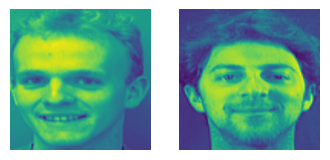

SAME


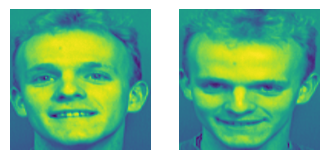

SAME


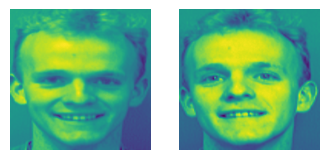

SAME


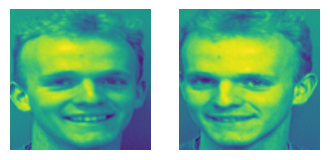

SAME


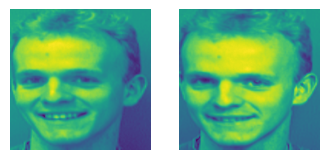

NOT SAME


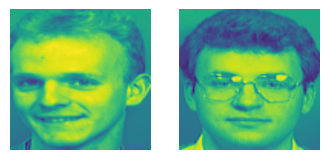

NOT SAME


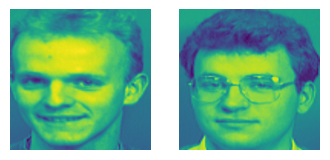

NOT SAME


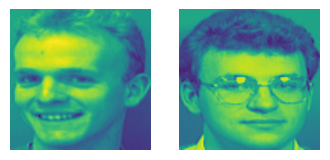

SAME


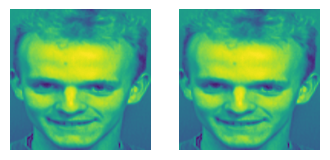

NOT SAME


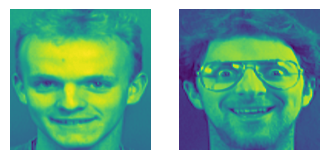

SAME


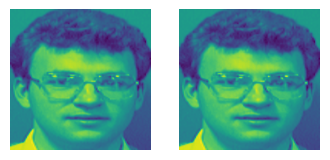

SAME


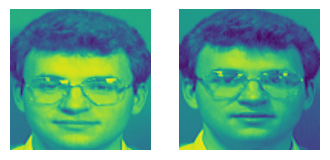

SAME


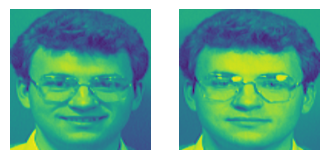

NOT SAME


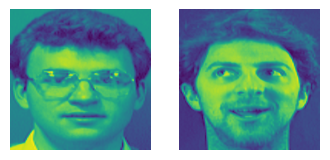

NOT SAME


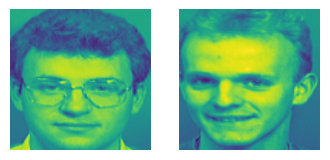

NOT SAME


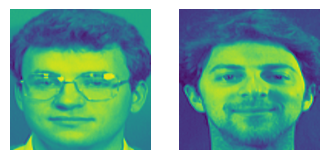

In [33]:
for i in range(x1.shape[0]):
    test(x1[i], x2[i], y[i],)